# Healthcare RSI Statistical significance
## Null Hypothesis 1 - The RSI of the heathcare fund, XLV, is the same as the RSI for the S&P 500
## Alternative Hypothesis 1 - The RSI of the heathcare fund, XLV, is different from the RSI for the S&P 500

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.stats.power import zt_ind_solve_power

key_alphavantage = '9HXBL1MHLXSUW3XP'
function = 'RSI'
interval = 'daily'

In [2]:
symbol1 = 'XLV'

response = requests.get(f'https://www.alphavantage.co/query?function={function}&symbol={symbol1}&interval={interval}&time_period=10&series_type=open&apikey={key_alphavantage}')
response = response.json()

In [3]:
symbol2 = '.INX'

response2 = requests.get(f'https://www.alphavantage.co/query?function={function}&symbol={symbol2}&interval=daily&time_period=10&series_type=open&apikey={key_alphavantage}')
response2 = response2.json()

In [4]:
l_keys = list(response[f'Technical Analysis: {function}'].keys())
l_keys = l_keys[1:]

In [5]:
l_keys2 = list(response2[f'Technical Analysis: {function}'].keys())
l_keys2 = l_keys2[1:]

In [6]:
date_rsi = {}

count = 0
for i in l_keys:
    rsi = response[f'Technical Analysis: {function}'][i][f'{function}']
    count += 1
    date_rsi[f'{i}'] = float(rsi)

In [7]:
date_rsi2 = {}

count2 = 0 
for i in l_keys2:
    rsi2 = response2[f'Technical Analysis: {function}'][i][f'{function}']
    count2 += 1
    date_rsi2[f'{i}'] = float(rsi2)

In [8]:
df = pd.DataFrame(date_rsi.items(), columns = ['date', f'{function}'])

In [9]:
df2 = pd.DataFrame(date_rsi2.items(), columns = ['date', f'{function}'])

In [10]:
year = [int(l_keys[i].split('-')[0]) for i in range(len(l_keys))]
month = [int(l_keys[i].split('-')[1]) for i in range(len(l_keys))]
day = [int(l_keys[i].split('-')[2]) for i in range(len(l_keys))]

In [11]:
year2 = [int(l_keys2[i].split('-')[0]) for i in range(len(l_keys2))]
month2 = [int(l_keys2[i].split('-')[1]) for i in range(len(l_keys2))]
day2 = [int(l_keys2[i].split('-')[2]) for i in range(len(l_keys2))]

In [12]:
df['year'] = year
df['month'] = month
df['day'] = day

In [13]:
df2['year'] = year2
df2['month'] = month2
df2['day'] = day2

In [14]:
df_2019 = df.loc[df['year'] == 2019]
df_2018 = df.loc[df['year'] == 2018]
df_2017 = df.loc[df['year'] == 2017]

df171819 = df.loc[df['year'] >= 2017]


df2_2019 = df2.loc[df2['year'] == 2019]
df2_2018 = df2.loc[df2['year'] == 2018]
df2_2017 = df2.loc[df2['year'] == 2017]

df2_171819_2 = df2.loc[df2['year'] >= 2017]

## Comparing the normalized RSI data for XLV and S&P500 

### 2019 exclusive data

In [15]:
sample_means19 = []
sample_means19_2 = []

for i in range(20000):
    sample19 = df_2019.sample(n=50, random_state=i) 
    sample_means19.append(sample19.RSI.mean())
    
    sample19_2 = df2_2019.sample(n=50, random_state=i) 
    sample_means19_2.append(sample19_2.RSI.mean())

### Evaluating z - score and statistical significance

In [16]:
xlv_bar19 = df_2019.RSI.mean()  ### xlv population mean (subset)
sp500_bar19 = df2_2019.RSI.mean() ### S&P500 population mean (universal population)

stan_dev19 = np.std(df2_2019.RSI) ### S&P500 population standard dev
stan_err19 = stan_dev19/np.sqrt(len(df2_2019))
z_score19 = (xlv_bar19 - sp500_bar19) / (stan_dev19/np.sqrt(len(df2_2019)))

print(f'The z_score is: {z_score19}')
p_val19 = stats.norm.cdf(z_score19)

print(f'The p-value is: {p_val19}')
print(f'The standard deviation is {stan_dev19}')
print(f'The standard error is {stan_err19}')   ### Z_score * Standard error = real difference between sample and pop means

The z_score is: -4.742707057467621
The p-value is: 1.054405539720337e-06
The standard deviation is 13.643736536004695
The standard error is 0.8825399505314985


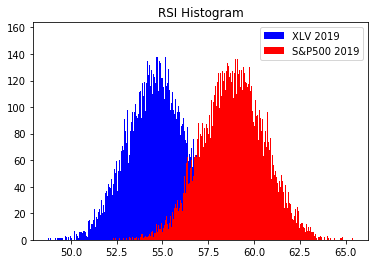

In [17]:
plt.hist(sample_means19, bins=500, color='blue', label='XLV 2019');
plt.hist(sample_means19_2, bins=500, color='red', label='S&P500 2019');
plt.title('RSI Histogram')
plt.legend();

### 2018 Exclusive

In [18]:
sample_means18 = []
sample_means18_2 = []
for i in range(20000):
    sample18 = df_2018.sample(n=50, random_state=i) 
    sample_means18.append(sample18.RSI.mean()) 
    
    sample18_2 = df2_2018.sample(n=50, random_state=i) 
    sample_means18_2.append(sample18_2.RSI.mean()) 

In [19]:
xlv_bar18 = df_2018.RSI.mean()  ### xlv population mean (subset)
sp500_bar18 = df2_2018.RSI.mean() ### S&P500 population mean (universal population)

stan_dev18 = np.std(df2_2018.RSI) ### S&P500 population standard dev
stan_err18 = stan_dev18/np.sqrt(len(df2_2018))
z_score18 = (xlv_bar18 - sp500_bar18) / stan_err18

print(f'The z_score is: {z_score18}')
#p_val18 = stats.norm.cdf(z_score18)   ### Survival function - since the sample distribution is to the right of the population
p_val18 = stats.norm.sf(z_score18)
print(f'The p-value is: {p_val18}')
print(f'The standard deviation is {stan_dev18}')
print(f'The standard error is {stan_err18}')   ### Z_score * Standard error = real difference between sample and pop means

The z_score is: 2.699868731842883
The p-value is: 0.0034683419823887565
The standard deviation is 15.747675009726795
The standard error is 0.9939844327942696


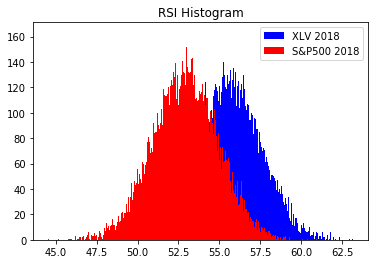

In [20]:
plt.hist(sample_means18, bins=500, color='blue', label = 'XLV 2018');
plt.hist(sample_means18_2, bins=500, color='red', label= 'S&P500 2018');
plt.title('RSI Histogram')
plt.legend();

### 2017 Exclusive

In [21]:
sample_means17 = []
sample_means17_2 = []
for i in range(20000):
    sample17 = df_2017.sample(n=50, random_state=i) 
    sample_means17.append(sample17.RSI.mean()) 
    
    sample17_2 = df2_2017.sample(n=50, random_state=i) 
    sample_means17_2.append(sample17_2.RSI.mean()) 

In [22]:
xlv_bar17 = df_2017.RSI.mean()  ### xlv population mean (subset)
sp500_bar17 = df2_2017.RSI.mean() ### S&P500 population mean (universal population)

stan_dev17 = np.std(df2_2017.RSI) ### S&P500 population standard dev
stan_err17 = stan_dev17/np.sqrt(len(df2_2017))
z_score17 = (xlv_bar17 - sp500_bar17) / stan_err17

print(f'The z_score is: {z_score17}')
p_val17 = stats.norm.cdf(z_score17)   ### Survival function - since the sample distribution is to the right of the population
#p_val17 = stats.norm.sf(z_score17)
print(f'The p-value is: {p_val17}')
print(f'The standard deviation is {stan_dev17}')
print(f'The standard error is {stan_err17}')   ### Z_score * Standard error = real difference between sample and pop means

The z_score is: -5.6241731018342085
The p-value is: 9.319933383486873e-09
The standard deviation is 12.124269743940395
The standard error is 0.7652771204023213


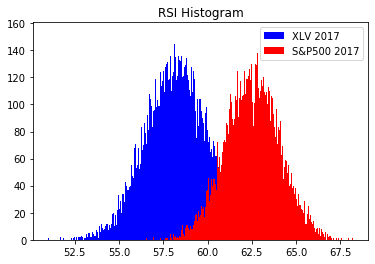

In [23]:
plt.hist(sample_means17, bins=500, color='blue', label='XLV 2017');
plt.hist(sample_means17_2, bins=500, color='red', label='S&P500 2017');
plt.title('RSI Histogram')
plt.legend();

### 2017 Through 2019 YTD

In [95]:
sample_means171819 = []
sample_means171819_2 = []
for i in range(10000):
    sample171819 = df171819.sample(n=50, random_state=i) 
    sample_means171819.append(sample171819.RSI.mean()) 
        
    sample171819_2 = df2_171819_2.sample(n=50, random_state=i) 
    sample_means171819_2.append(sample171819_2.RSI.mean()) 

In [96]:
xlv_bar171819 = df171819.RSI.mean()  ### xlv population mean (subset)
sp500_bar171819 = df2_171819_2.RSI.mean() ### S&P500 population mean (universal population)

stan_dev171819 = np.std(df2_171819_2.RSI) ### S&P500 population standard dev
stan_err171819 = stan_dev171819/np.sqrt(len(df2_171819_2))
z_score171819 = (xlv_bar171819 - sp500_bar171819) / stan_err171819

print(f'The z_score is: {z_score171819}')
p_val171819 = stats.norm.cdf(z_score171819)   
print(f'The p-value is: {p_val171819}')
print(f'The standard deviation is {stan_dev171819}')
print(f'The standard error is {stan_err171819}') 

The z_score is: -3.5679423012244893
The p-value is: 0.0001798978527782417
The standard deviation is 14.487565516438528
The standard error is 0.5322140176512441


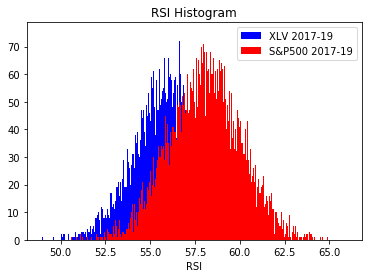

In [134]:
plt.hist(sample_means171819, bins=500, color = 'blue', label='XLV 2017-19');
plt.hist(sample_means171819_2, bins=500, color = 'red', label='S&P500 2017-19');
plt.title('RSI Histogram')
plt.xlabel('RSI')
plt.legend();

### Current RSI & Price

In [54]:
symbol = 'XLV'
function = 'RSI'
xlv_rsi = requests.get(f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval=daily&time_period=10&series_type=open&apikey={key_alphavantage}')

In [98]:
xlv_rsi = xlv_rsi.json()

AttributeError: 'dict' object has no attribute 'json'

In [99]:
xlv_10day = [pair['RSI'] for pair in list(xlv_rsi['Technical Analysis: RSI'].values())[0:11]]
xlv_10day

['67.4025',
 '66.9611',
 '64.6645',
 '75.9496',
 '75.0204',
 '72.5840',
 '69.1720',
 '62.4232',
 '88.4782',
 '88.1252',
 '87.7885']

In [100]:
symbol = '.INX' ### S&P500
function = 'RSI'
sp500_rsi = requests.get(f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval=daily&time_period=10&series_type=open&apikey={key_alphavantage}')

In [101]:
sp500_rsi = sp500_rsi.json()

In [102]:
sp500_10day = [pair['RSI'] for pair in list(sp500_rsi['Technical Analysis: RSI'].values())[0:11]]
sp500_10day

['61.6553',
 '59.6041',
 '59.4653',
 '62.6987',
 '60.5482',
 '55.6504',
 '49.9493',
 '43.2213',
 '75.0851',
 '78.1440',
 '77.7296']

## Cohen's D and Power

In [103]:
def cohen_d(xlv, sp500):

    diff_mean = xlv.mean() - sp500.mean()

    n_xlv = len(xlv)
    n_sp500 = len(sp500)
    var_xlv = xlv.var()
    var_sp500 = sp500.var()

    pooled_var = (n_xlv * var_xlv + n_sp500 * var_sp500) / (n_xlv + n_sp500)

    cod = diff_mean / np.sqrt(pooled_var)

    return cod

### 2019

In [104]:
cod19 = cohen_d(df_2019['RSI'], df2_2019['RSI'])

In [105]:
n1_19 = len(df_2019['RSI'])
n2_19 = len(df2_2019['RSI'])
ratio = n1_19/n2_19
xlv_19_power = zt_ind_solve_power(effect_size = cod19, nobs1=n1_19, power = None, alpha = .05) 
print(xlv_19_power, cod19)

0.931263916985638 -0.3151626984165812


This value for power is close to 1, so there is minimal posibility for a Type 2 Error
The cohen's d value is negative

### 2018

In [106]:
cod18 = cohen_d(df_2018['RSI'], df2_2018['RSI'])

In [107]:
n1_18 = len(df_2018['RSI'])
n2_18 = len(df2_2018['RSI'])
ratio = n1_18/n2_18
xlv_18_power = zt_ind_solve_power(effect_size = cod18, nobs1=n1_18, power = None, alpha = .05) 
print(xlv_18_power, cod18)

0.48056801609630434 0.1705931324800668


### 2017

In [108]:
cod17 = cohen_d(df_2017['RSI'], df2_2017['RSI'])

In [109]:
n1_17 = len(df_2017['RSI'])
n2_17 = len(df2_2017['RSI'])
ratio = n1_17/n2_17
xlv_17_power = zt_ind_solve_power(effect_size = cod17, nobs1=n1_17, power = None, alpha = .05) 
print(xlv_17_power, cod17)

0.9574432523182477 -0.3286465159491992


### 2017 - 2019

In [110]:
cod171819 = cohen_d(df171819['RSI'], df2_171819_2['RSI'])

In [112]:
n1_171819 = len(df171819['RSI'])
n2_171819 = len(df2_171819_2['RSI'])
ratio = n1_171819/n2_171819
xlv_171819_power = zt_ind_solve_power(effect_size = cod171819, nobs1=n1_171819, power = None, alpha = .05) 
print(f'Power= {xlv_171819_power}\nCohen D= {cod171819}')

Power= 0.7182418615083781
Cohen D= -0.13183347431670678


In [113]:
df171819['RSI'].mean() - df2_171819_2['RSI'].mean()

-1.898908906882511

## Conclusion

This is something!

## Null Hypothesis 2 - The RSI of the Johnson & Johnson, the largest holdings in the heathcare fund, XLV, is the same as the RSI for the S&P 500 {or xlv}
## Alternative Hypothesis 2 - The RSI of the JNJ in the heathcare fund, XLV, is different from the RSI for the S&P 500 {or xlv}

In [63]:
symbol_set = ['JNJ', 'MRK', 'UNH', 'PFE', 'ABT'] ### TOP 5 HOLDING SIZE IN THE XLV

In [132]:
all_list = []
for symbol in symbol_set:
    response = requests.get(f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval={interval}&time_period=10&series_type=open&apikey={key_alphavantage}')
    jason = response.json()
    all_list.append(jason)
all_list[3]

{'Note': 'Thank you for using Alpha Vantage! Our standard API call frequency is 5 calls per minute and 500 calls per day. Please visit https://www.alphavantage.co/premium/ if you would like to target a higher API call frequency.'}

In [133]:
all_list

[{'Note': 'Thank you for using Alpha Vantage! Our standard API call frequency is 5 calls per minute and 500 calls per day. Please visit https://www.alphavantage.co/premium/ if you would like to target a higher API call frequency.'},
 {'Note': 'Thank you for using Alpha Vantage! Our standard API call frequency is 5 calls per minute and 500 calls per day. Please visit https://www.alphavantage.co/premium/ if you would like to target a higher API call frequency.'},
 {'Note': 'Thank you for using Alpha Vantage! Our standard API call frequency is 5 calls per minute and 500 calls per day. Please visit https://www.alphavantage.co/premium/ if you would like to target a higher API call frequency.'},
 {'Note': 'Thank you for using Alpha Vantage! Our standard API call frequency is 5 calls per minute and 500 calls per day. Please visit https://www.alphavantage.co/premium/ if you would like to target a higher API call frequency.'},
 {'Note': 'Thank you for using Alpha Vantage! Our standard API call 

In [130]:
for i in range(all_list):
    for k, v in all_list[i]['Technical Analysis: RSI'].items():
        zip(k, v['RSI'])
    

TypeError: 'list' object cannot be interpreted as an integer

In [65]:
dictjnj = {}

lenny = len(all_list[0]['Technical Analysis: RSI'])
for i in range(lenny):
    date = list(all_list[0]['Technical Analysis: RSI'].keys())[i]
    rsi = float(list(all_list[0]['Technical Analysis: RSI'].values())[i]['RSI'])
    dictjnj[f'{date}'] = rsi
df_jnj = pd.DataFrame(dictjnj.items(), columns = ['date', 'rsi'])

year = []
for i in range(lenny):
    year.append(int(df_jnj['date'][i].split('-')[0]))

In [66]:
df_jnj['year'] = year
df_jnj.drop(0, inplace = True)

In [67]:
df_jnj = df_jnj.loc[df_jnj['year'] >=2017] #2017 and newer data

In [68]:
sample_meansjnj = []

for i in range(20000):
    samplejnj = df_jnj.sample(n=50, random_state=i) 
    sample_meansjnj.append(samplejnj.rsi.mean()) 

In [74]:
jnj_bar= df_jnj.rsi.mean()  ### johnson and johnson population mean (subset)
#
stan_dev171819xlv = np.std(df171819.RSI)
z_scorejnj = (jnj_bar - xlv_bar171819) / (stan_dev171819xlv/np.sqrt(len(df171819)))
p_valjnj = stats.norm.cdf(z_scorejnj)
stan_err171819xlv = stan_dev171819xlv/np.sqrt(len(df171819))
#
print(f'The z_score is: {z_scorejnj}')
p_valjnj = stats.norm.cdf(z_scorejnj)

print(f'The p-value is: {p_valjnj}')
print(f'The standard deviation is {stan_dev171819xlv}')
print(f'The standard error is {stan_err171819xlv}')

The z_score is: -4.954691030604307
The p-value is: 3.622265595407338e-07
The standard deviation is 14.300068597971569
The standard error is 0.5253261462444642


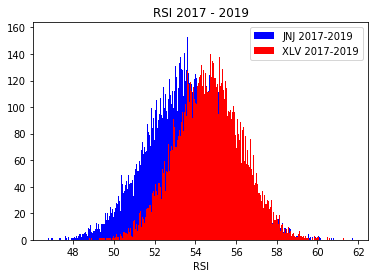

In [135]:
plt.hist(sample_meansjnj, bins=500, color='blue', label='JNJ 2017-2019');
plt.hist(sample_means19, bins=500, color='red', label='XLV 2017-2019');
plt.title('RSI 2017 - 2019')
plt.xlabel('RSI')
plt.legend();

In [78]:
print(z_scorejnj * stan_err171819xlv)
print(jnj_bar - xlv_bar171819)

-2.602828744939373
-2.602828744939373


### Cohen's D for Johnson & Johnson and XLV - 2017-2019

In [82]:
codjnj = cohen_d(df_jnj['rsi'], df171819['RSI'])

In [118]:
n1_jnj = len(df_jnj['rsi'])
n2_xlv = len(df171819['RSI'])
ratio = n1_jnj/n2_xlv
jnj_power = zt_ind_solve_power(effect_size = codjnj, nobs1=n1_jnj, power = None, alpha = .05) 
print(jnj_power, codjnj)

0.9374578892797565 -0.18150839890808018


In [ ]:
dictunh = {}

lenny = len(all_list[2]['Technical Analysis: RSI'])
for i in range(1, lenny):
    date = list(all_list[2]['Technical Analysis: RSI'].keys())[i]
    rsi = float(list(all_list[2]['Technical Analysis: RSI'].values())[i]['RSI'])
    dictunh[f'{date}'] = rsi
df_unh = pd.DataFrame(dictunh.items(), columns = ['date', 'rsi'])

In [ ]:
dictpfe = {}

lenny = len(all_list[3]['Technical Analysis: RSI'])
for i in range(1, lenny):
    date = list(all_list[3]['Technical Analysis: RSI'].keys())[i]
    rsi = float(list(all_list[3]['Technical Analysis: RSI'].values())[i]['RSI'])
    dictpfe[f'{date}'] = rsi
df_pfe = pd.DataFrame(dictpfe.items(), columns = ['date', 'rsi'])

In [ ]:
dictabt = {}

lenny = len(all_list[4]['Technical Analysis: RSI'])
for i in range(1, lenny):
    date = list(all_list[1]['Technical Analysis: RSI'].keys())[i]
    rsi = float(list(all_list[1]['Technical Analysis: RSI'].values())[i]['RSI'])
    dictabt[f'{date}'] = rsi
df_abt = pd.DataFrame(dictabt.items(), columns = ['date', 'rsi'])

In [ ]:
xlv_bar = xlvdf.RSI.mean()  ### xlv population mean (subset)
sp500_bar = sp500df.RSI.mean() ### S&P500 population mean (universal population)

sp500_stan_dev = np.std(sp500df.RSI) ### S&P500 population standard dev
sp500_stan_err = sp500stan_dev/np.sqrt(len(sp500df))
xlv_z_score = (xlv_bar - sp500_bar) / (sp500stan_dev/np.sqrt(len(sp500df)))

print(f'The z_score is: {xlv_z_score}')
xlv_p_val = stats.norm.cdf(xlv_z_score)

print(f'The p-value is: {xlv_p_val}')
print(f'The standard deviation is {sp500_stan_dev}')
print(f'The standard error is {sp500_stan_err}')